In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fer2013/fer2013.csv


In [3]:
data = pd.read_csv('/kaggle/input/fer2013/fer2013.csv')
data.head(3)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training


In [4]:
data.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [5]:
data = data.drop(['Usage'], axis=1)
data.shape

(35887, 2)

In [6]:
from sklearn.model_selection import train_test_split

train = data['pixels']
test = data['emotion']

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.1, random_state=10)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32298,) (3589,) (32298,) (3589,)


In [8]:
width, height = 48, 48

X_train1 = []
for i in X_train:
    X_train1.append([int(p) for p in i.split()])
X_train1 = np.array(X_train1)/255.
X_train1.shape

(32298, 2304)

In [9]:
X_test1 = []
for i in X_test:
    X_test1.append([int(p) for p in i.split()])
X_test1 = np.array(X_test1)/255.
X_test1.shape

(3589, 2304)

In [10]:
X_test1[:2]

array([[0.72941176, 0.32156863, 0.37647059, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.34509804, 0.32941176, 0.36470588, ..., 0.64705882, 0.59607843,
        0.56078431]])

In [11]:
X_train1 = X_train1.reshape(X_train1.shape[0], 48, 48, 1)

X_train1.shape

(32298, 48, 48, 1)

In [12]:
X_test1 = X_test1.reshape(X_test1.shape[0], 48, 48, 1)

X_test1.shape

(3589, 48, 48, 1)

In [13]:
X_train32 = X_train1.astype('float32')
X_test32 = X_test1.astype('float32')

X_train32.dtype, X_test32.dtype

(dtype('float32'), dtype('float32'))

# Start to build model and train

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Flatten, Dense, Activation, Dropout, MaxPooling2D, BatchNormalization

Using TensorFlow backend.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization

In [16]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), input_shape = (48, 48, 1), padding='same'))
model.add(Conv2D(64, kernel_size=(5,5), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same'))
model.add(Conv2D(128, kernel_size=(5,5), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same'))
model.add(Conv2D(256, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
activation (Activation)      (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       4

In [18]:
from tensorflow.keras.utils import to_categorical
n_epochs = 50
batch_size = 128
lr = 0.0001

In [19]:
history = model.fit(X_train32, to_categorical(y_train), 
                    batch_size = batch_size, epochs = n_epochs, validation_data= (X_test32, to_categorical(y_test)))

Epoch 1/50
253/253 [==============================] - 10s 39ms/step - loss: 1.6211 - accuracy: 0.3803 - val_loss: 1.6312 - val_accuracy: 0.3892
Epoch 2/50
253/253 [==============================] - 9s 36ms/step - loss: 1.2747 - accuracy: 0.5153 - val_loss: 1.3584 - val_accuracy: 0.4843
Epoch 3/50
253/253 [==============================] - 9s 36ms/step - loss: 1.1389 - accuracy: 0.5733 - val_loss: 1.3264 - val_accuracy: 0.5205
Epoch 4/50
253/253 [==============================] - 9s 36ms/step - loss: 1.0635 - accuracy: 0.5988 - val_loss: 1.2215 - val_accuracy: 0.5352
Epoch 5/50
253/253 [==============================] - 9s 37ms/step - loss: 0.9840 - accuracy: 0.6324 - val_loss: 1.2211 - val_accuracy: 0.5389
Epoch 6/50
253/253 [==============================] - 9s 36ms/step - loss: 0.9144 - accuracy: 0.6587 - val_loss: 1.2257 - val_accuracy: 0.5511
Epoch 7/50
253/253 [==============================] - 9s 36ms/step - loss: 0.8393 - accuracy: 0.6894 - val_loss: 1.3012 - val_accuracy: 0.550

In [20]:
pd.DataFrame(history.history).tail()

,loss,accuracy,val_loss,val_accuracy
45,0.053056,0.982476,2.347844,0.607969
46,0.053663,0.981949,2.687486,0.602118
47,0.044818,0.984612,2.608027,0.597660
48,0.048955,0.984024,2.222175,0.605461
49,0.052420,0.982259,2.734186,0.604068


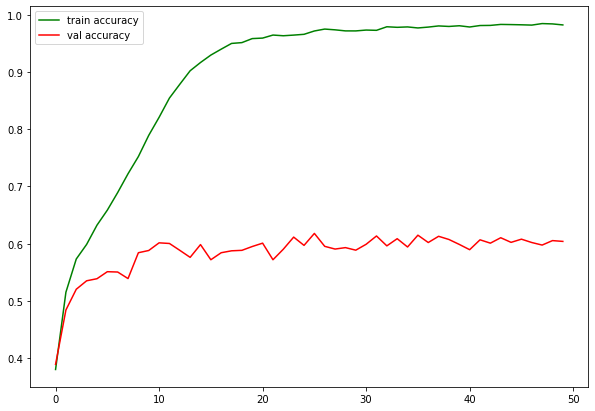

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'], color='green', label='train accuracy') # replace by the accuracy want to exract
plt.plot(history.history['val_accuracy'], color='red', label='val accuracy') # '''''
plt.legend()
plt.savefig('accuracy.png')
plt.show()